In [1]:
import osmnx as ox
import contextily as cx
import pandas as pd
import geopandas as gpd

from pathlib import Path

import matplotlib.pyplot as plt
from IPython.display import display

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
from pickle import load, dump
#from joblib import load, dump
#from sklearn.externals import joblib

In [3]:
filename = Path('..','data','limite_administrative', 'limites-administratives-agglomeration.geojson')
adm = gpd.read_file(filename)
print(adm.shape)
print(adm.columns)
display(adm.head(3))
#adm.explore()

(34, 9)
Index(['CODEID', 'NOM', 'CODEMAMH', 'NUM', 'ABREV', 'TYPE', 'COMMENT',
       'DATEMODIF', 'geometry'],
      dtype='object')


CODEID                        NOM CODEMAMH  NUM ABREV            TYPE  \
0      34                      Anjou    REM09    9    AJ  Arrondissement   
1      33              Pointe-Claire    66097    8    PC      Ville liée   
2      18  Rosemont-La Petite-Patrie    REM24   25    RO  Arrondissement   

  COMMENT   DATEMODIF                                           geometry  
0     NaN  2022-08-24  MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ...  
1     NaN  2022-08-24  MULTIPOLYGON (((-73.76847 45.41859, -73.77866 ...  
2     NaN  2022-08-24  MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ...

In [35]:
import functions
y= 2021

d = functions.generate_source_path(name='depot',year=y, prepath='../').absolute()
dd = pd.read_csv(d, index_col=0)

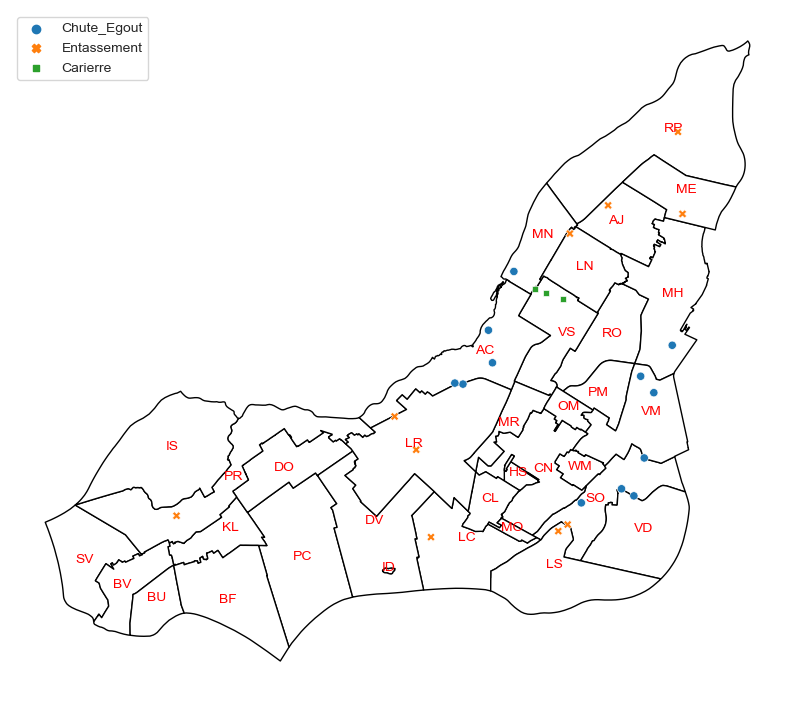

In [51]:
import seaborn as sns

filename = Path('..','media','abbreviation_arrondissement.png')

gdf_swk = adm
gdf_swk['coords'] = gdf_swk['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf_swk['coords'] = [coords[0] for coords in gdf_swk['coords']]
fig, ax = plt.subplots(figsize = (10,10))
ax.set_axis_off();
gdf_swk.plot(ax=ax, color='white', edgecolor='black', legend=True)
for idx, row in gdf_swk.iterrows():
    plt.annotate(text=row['ABREV'], xy=row['coords'], horizontalalignment='center', color='r')

#plt.scatter(dd['Longitude'],dd['Latitude', ] )


# replacing values
dd['c'] = dd['TypeDepot'].replace(['Chute_Egout', 'Carierre', 'Entassement'],
                        ['m', 'g', 'r'])
#dd.plot.scatter(ax=ax, x='Longitude', y='Latitude', c='c', legend=True)
sns.scatterplot(ax=ax, data=dd, x='Longitude', y='Latitude', hue='TypeDepot', style='TypeDepot'),
plt.legend(loc='upper left')

#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
fig.savefig(filename)

CODEID                                                      34
NOM                                                      Anjou
CODEMAMH                                                 REM09
NUM                                                          9
ABREV                                                       AJ
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6031403560556 45.611125588...
coords                  (-73.5733561399629, 45.61224927548355)
Name: 0, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


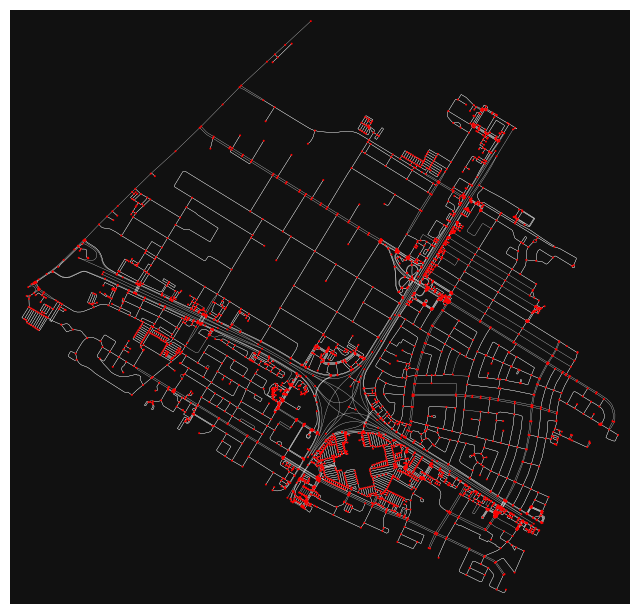

CODEID                                                      33
NOM                                              Pointe-Claire
CODEMAMH                                                 66097
NUM                                                          8
ABREV                                                       PC
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.7684654518276 45.418585244...
coords                  (-73.80547874280364, 45.4377030587015)
Name: 1, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


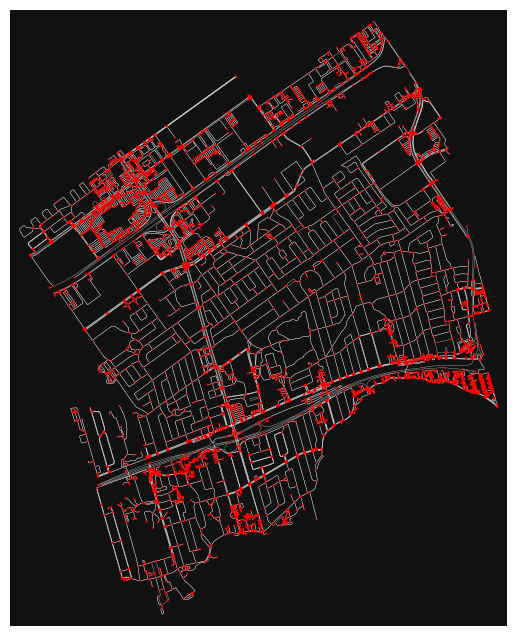

CODEID                                                      18
NOM                                  Rosemont-La Petite-Patrie
CODEMAMH                                                 REM24
NUM                                                         25
ABREV                                                       RO
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5871137525419 45.566406188...
coords                 (-73.5757965695059, 45.553896607500604)
Name: 2, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


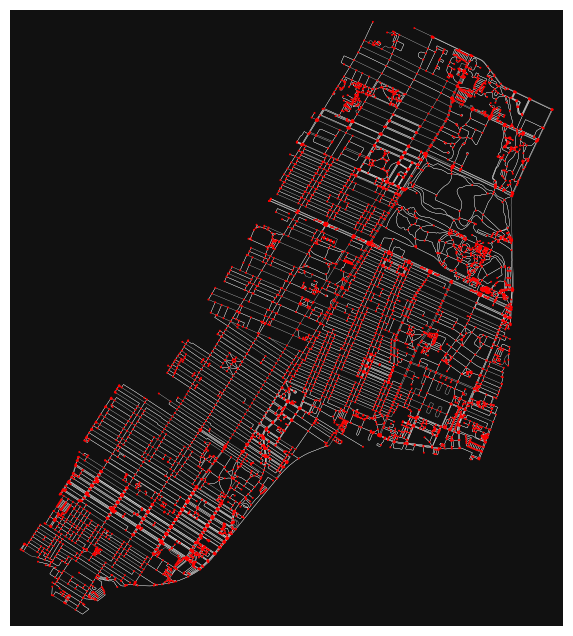

CODEID                                                      21
NOM                                                   Kirkland
CODEMAMH                                                 66102
NUM                                                          3
ABREV                                                       KL
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.8383305546632 45.445453457...
coords                  (-73.85893748125741, 45.4528897049631)
Name: 3, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


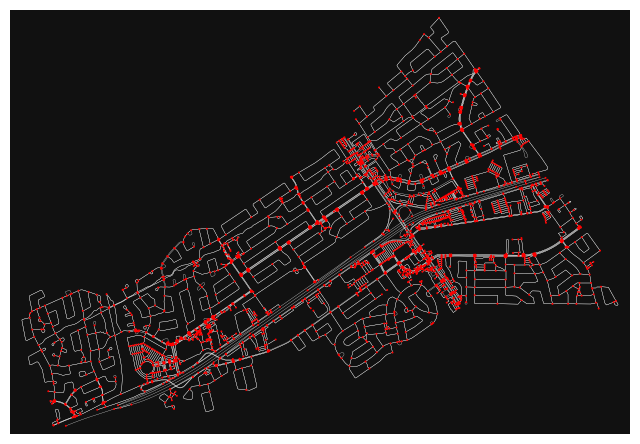

CODEID                                                      22
NOM                                                  Westmount
CODEMAMH                                                 66032
NUM                                                          4
ABREV                                                       WM
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5951279611999 45.476450994...
coords                (-73.59945862077313, 45.484705776260995)
Name: 4, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


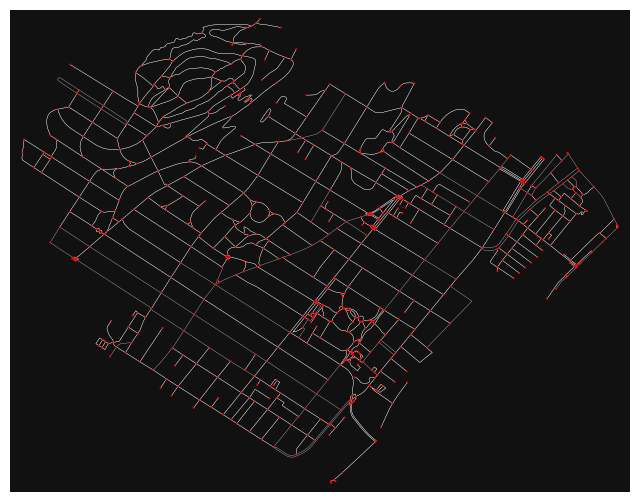

CODEID                                                       2
NOM                                                  Hampstead
CODEMAMH                                                 66062
NUM                                                         10
ABREV                                                       HS
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6388305996177 45.483438763...
coords                 (-73.64578012490503, 45.48148906842685)
Name: 5, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


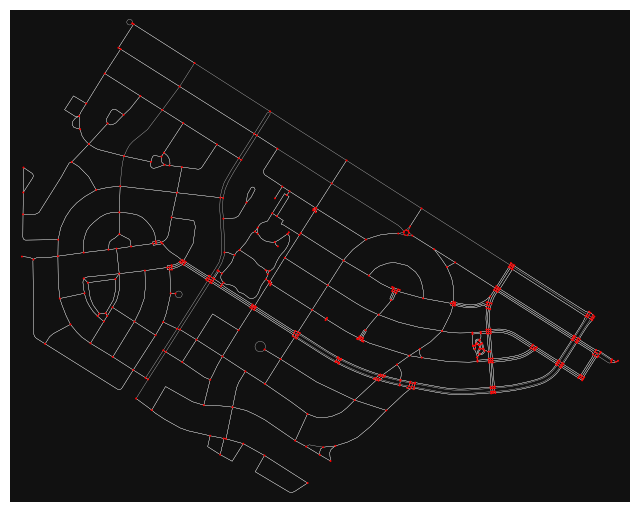

CODEID                                                      16
NOM                              Mercier-Hochelaga-Maisonneuve
CODEMAMH                                                 REM22
NUM                                                         23
ABREV                                                       MH
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5697021726863 45.596604781...
coords                  (-73.53112463995333, 45.5743385593925)
Name: 6, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


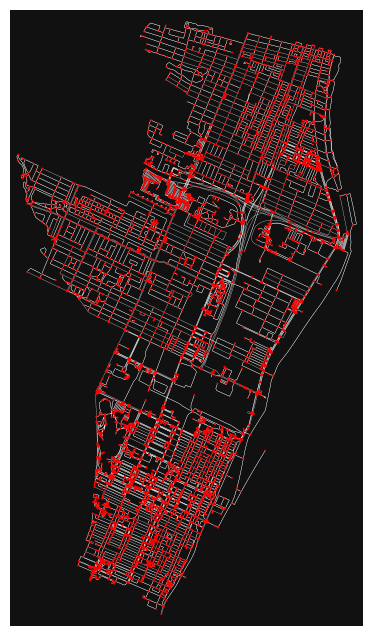

CODEID                                                      32
NOM                                                 Senneville
CODEMAMH                                                 66127
NUM                                                         77
ABREV                                                       SV
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.9606357611013 45.405796405...
coords                 (-73.96718359311697, 45.43610408421395)
Name: 7, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


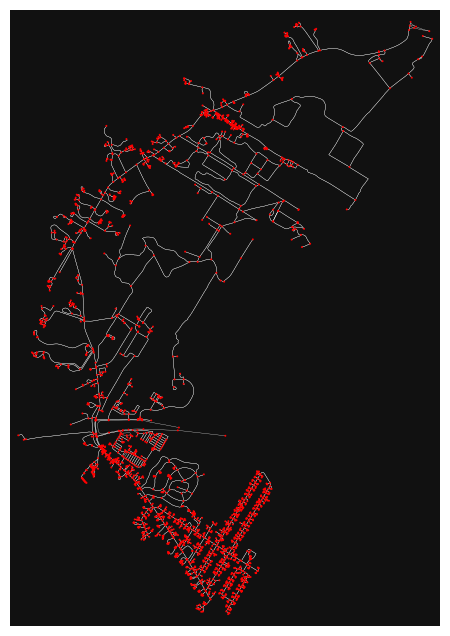

CODEID                                                      14
NOM                                               Le Sud-Ouest
CODEMAMH                                                 REM20
NUM                                                         21
ABREV                                                       SO
TYPE                                            Arrondissement
COMMENT      Il est important de noter que la limite située...
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6352955068788 45.450775909...
coords                  (-73.5885621995298, 45.46798929039265)
Name: 8, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


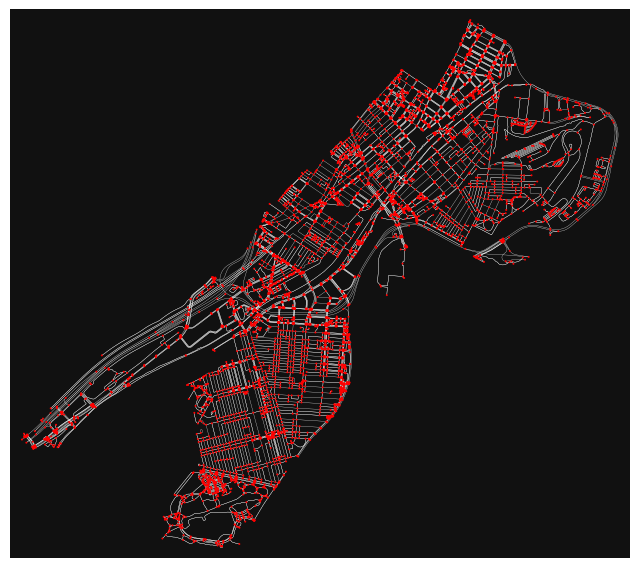

CODEID                                                      11
NOM                   Rivière-des-Prairies-Pointe-aux-Trembles
CODEMAMH                                                 REM33
NUM                                                         19
ABREV                                                       RP
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.4840372792737 45.631691512...
coords                  (-73.53057339672901, 45.6603873895058)
Name: 9, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


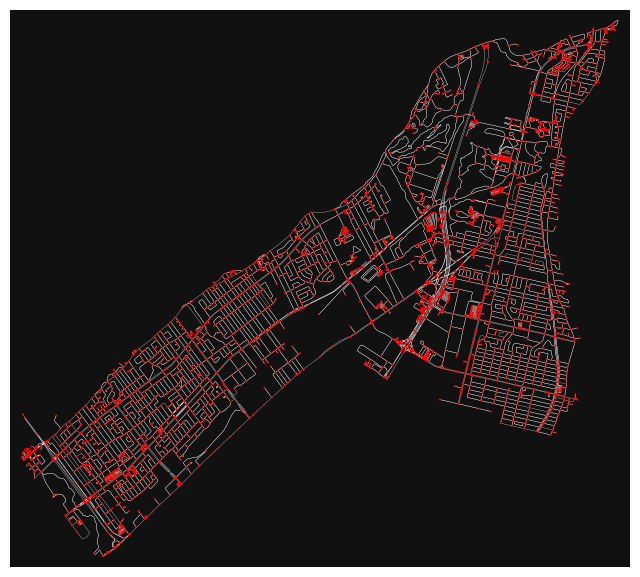

CODEID                                                      31
NOM                                    Sainte-Anne-de-Bellevue
CODEMAMH                                                 66117
NUM                                                         76
ABREV                                                       BV
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.9606357611013 45.405796405...
coords                  (-73.93975202796224, 45.4235987014142)
Name: 10, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


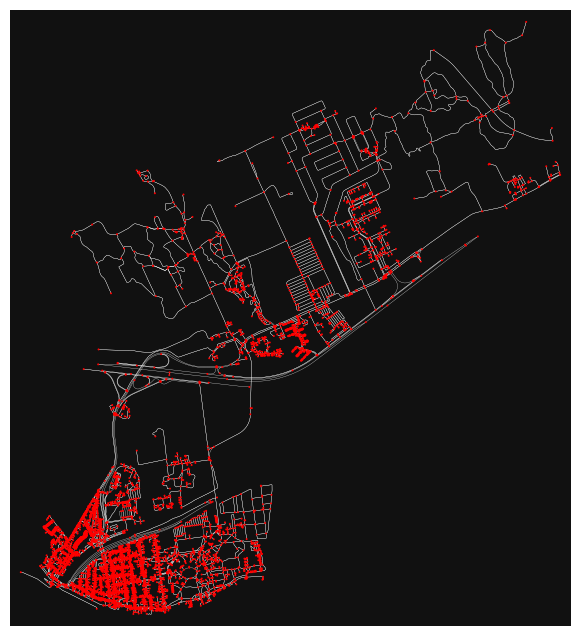

CODEID                                                      15
NOM                                      Le Plateau-Mont-Royal
CODEMAMH                                                 REM21
NUM                                                         22
ABREV                                                       PM
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5902651117492 45.515780078...
coords                (-73.58629332501555, 45.523309766709204)
Name: 11, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


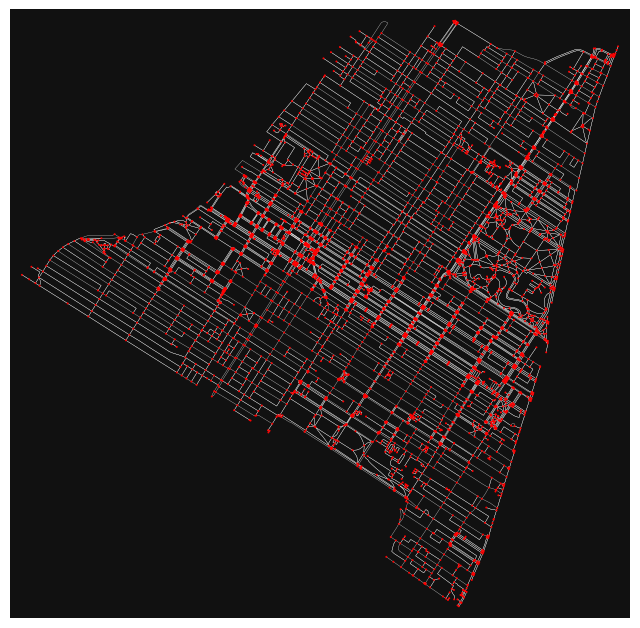

CODEID                                                       4
NOM                                                     Verdun
CODEMAMH                                                 REM12
NUM                                                         12
ABREV                                                       VD
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5397979438208 45.428049341...
coords                  (-73.55298502713623, 45.4523261578124)
Name: 12, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


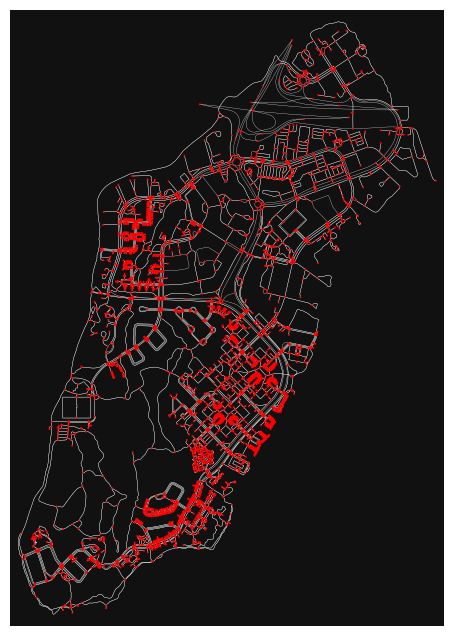

CODEID                                                       3
NOM                                        Dollard-Des Ormeaux
CODEMAMH                                                 66142
NUM                                                         11
ABREV                                                       DO
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.8465518397219 45.462570024...
coords                (-73.81910300576652, 45.484380211397294)
Name: 13, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


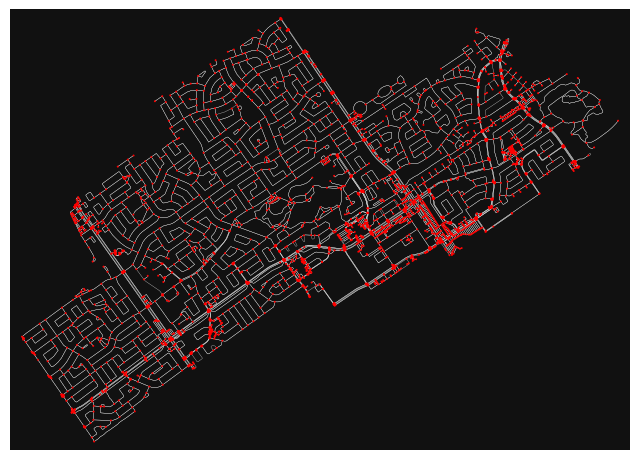

CODEID                                                      29
NOM                                               Montréal-Est
CODEMAMH                                                 66007
NUM                                                         74
ABREV                                                       ME
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.4840372792737 45.631691512...
coords                 (-73.52067922906826, 45.62862691225595)
Name: 14, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


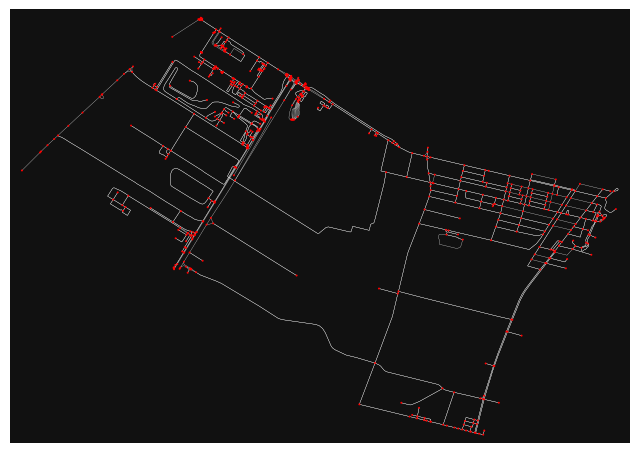

CODEID                                                      26
NOM                                                Baie-D'Urfé
CODEMAMH                                                 66112
NUM                                                         71
ABREV                                                       BU
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.9335933241329 45.398781971...
coords                  (-73.91405408059275, 45.4166729500419)
Name: 15, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


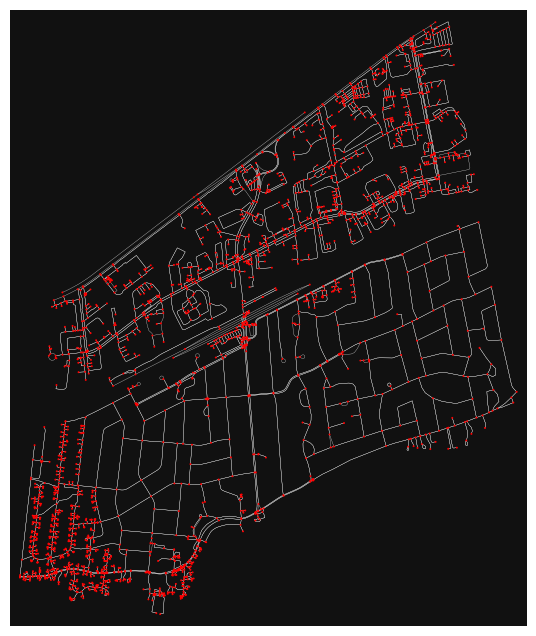

CODEID                                                       9
NOM                                                    Lachine
CODEMAMH                                                 REM27
NUM                                                         17
ABREV                                                       LC
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6828057220894 45.463178881...
coords                  (-73.6833918824961, 45.44762480738365)
Name: 16, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


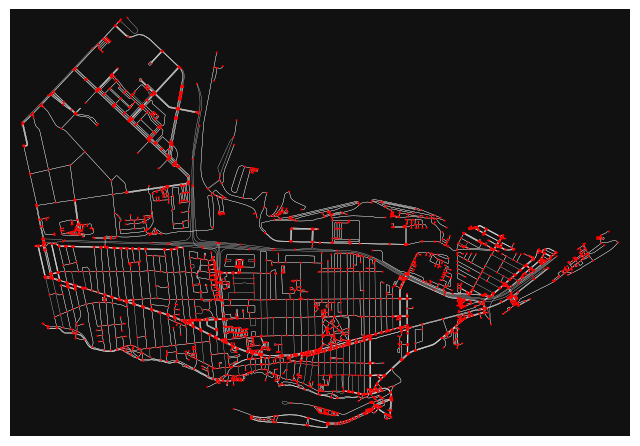

CODEID                                                      20
NOM                        Côte-des-Neiges-Notre-Dame-de-Grâce
CODEMAMH                                                 REM34
NUM                                                         27
ABREV                                                       CN
TYPE                                            Arrondissement
COMMENT      Il est important de noter que la limite située...
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6444597314697 45.473966957...
coords                 (-73.62699004503347, 45.48364704808555)
Name: 17, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


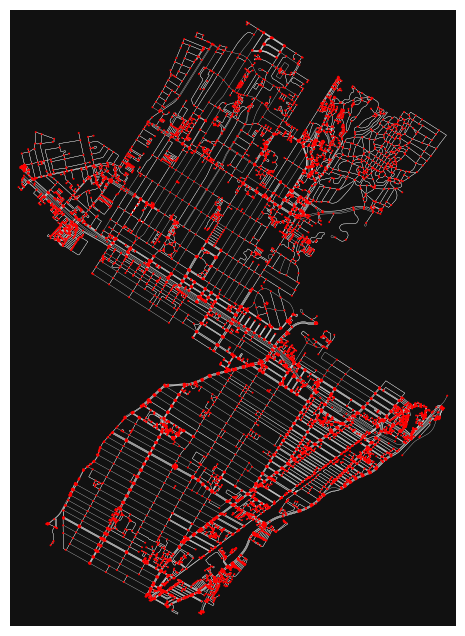

CODEID                                                      19
NOM                       Villeray-Saint-Michel-Parc-Extension
CODEMAMH                                                 REM25
NUM                                                         26
ABREV                                                       VS
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5871137525419 45.566406188...
coords                 (-73.6092389988586, 45.554408430069046)
Name: 18, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


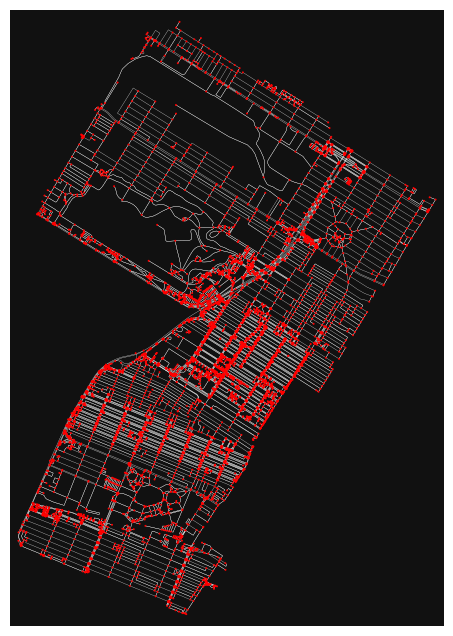

CODEID                                                      28
NOM                                               L'Île-Dorval
CODEMAMH                                                 66092
NUM                                                         73
ABREV                                                       ID
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.7370749637668 45.433051206...
coords                 (-73.74202459568878, 45.43205580686735)
Name: 19, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


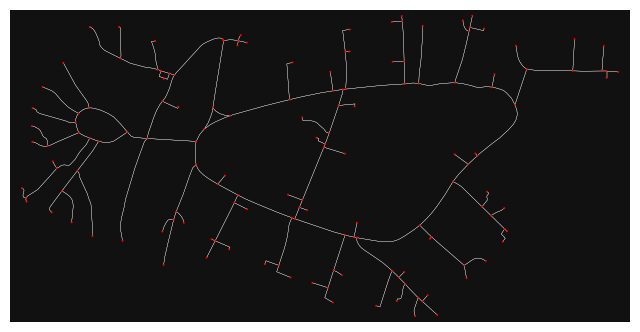

CODEID                                                      27
NOM                                             Côte-Saint-Luc
CODEMAMH                                                 66058
NUM                                                         72
ABREV                                                       CL
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6828057220894 45.463178881...
coords                 (-73.66640257398382, 45.46812397888795)
Name: 20, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


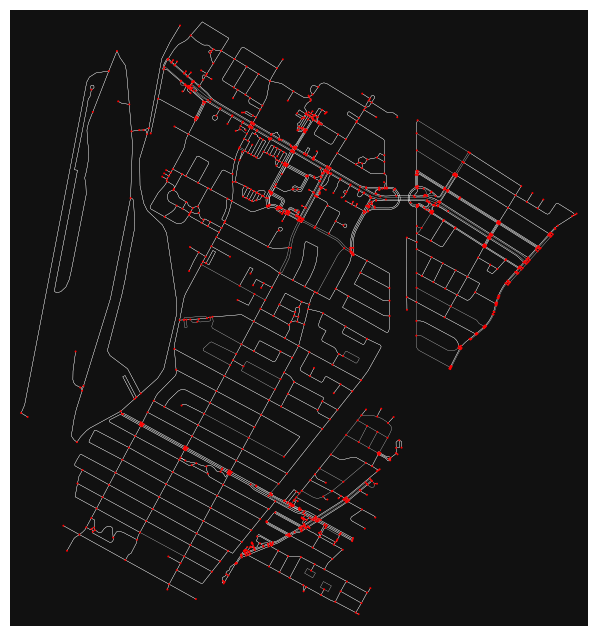

CODEID                                                      25
NOM                                               Beaconsfield
CODEMAMH                                                 66107
NUM                                                          7
ABREV                                                       BF
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.8383305546632 45.445453457...
coords                  (-73.86098517260129, 45.4155957551042)
Name: 21, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


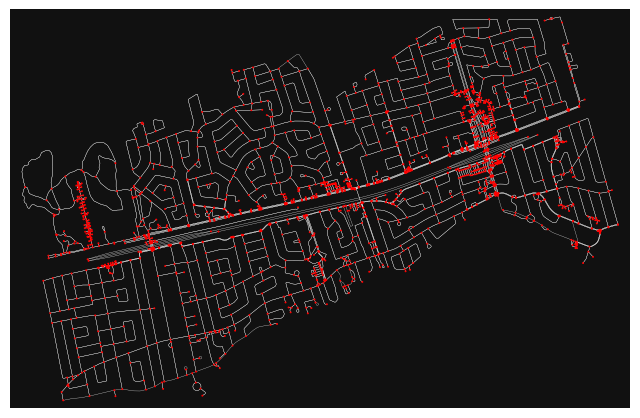

CODEID                                                       5
NOM                                        Pierrefonds-Roxboro
CODEMAMH                                                 REM31
NUM                                                         13
ABREV                                                       PR
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.7636906258387 45.511907256...
coords                  (-73.85705628484601, 45.4796747112034)
Name: 22, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


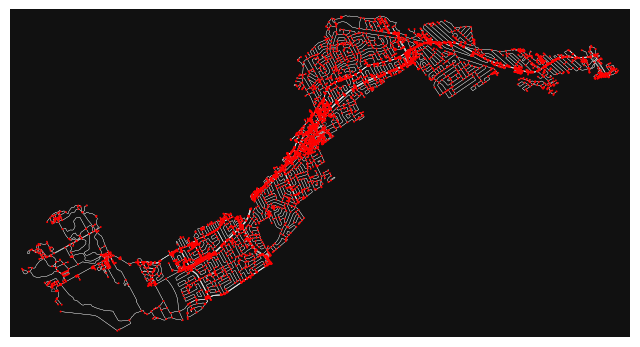

CODEID                                                       8
NOM                                              Montréal-Nord
CODEMAMH                                                 REM16
NUM                                                         16
ABREV                                                       MN
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6031403560556 45.611125588...
coords                 (-73.62756233996592, 45.60497867446105)
Name: 23, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


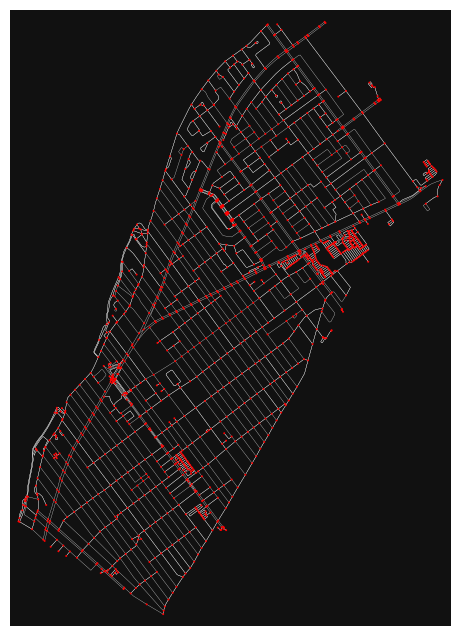

CODEID                                                      12
NOM                                                 Mont-Royal
CODEMAMH                                                 66072
NUM                                                          2
ABREV                                                       MR
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6481900422291 45.530719864...
coords                 (-73.65228749538628, 45.50730742592265)
Name: 24, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


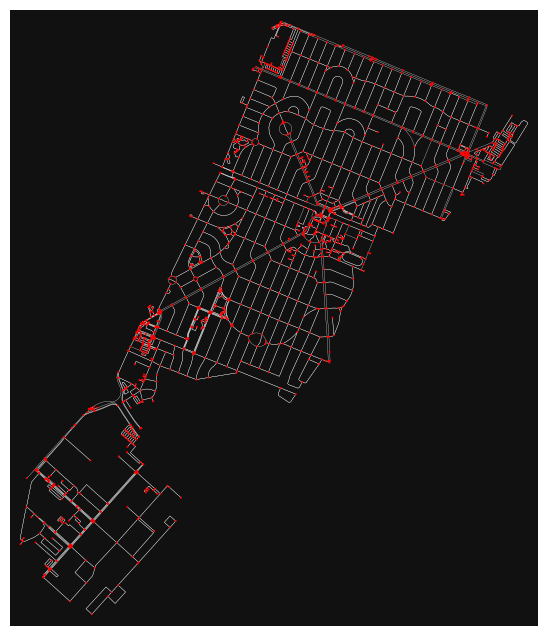

CODEID                                                      30
NOM                                             Montréal-Ouest
CODEMAMH                                                 66047
NUM                                                         75
ABREV                                                       MO
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6352955068788 45.450775909...
coords                 (-73.65029755871947, 45.45312110234505)
Name: 25, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


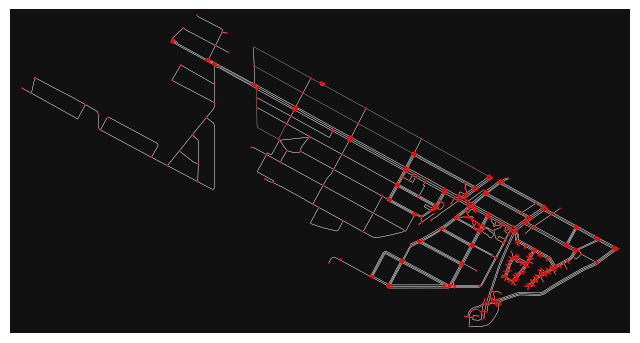

CODEID                                                      17
NOM                                      Ahuntsic-Cartierville
CODEMAMH                                                 REM23
NUM                                                         24
ABREV                                                       AC
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.7636906258387 45.511907256...
coords                   (-73.67085914623253, 45.545067273022)
Name: 26, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


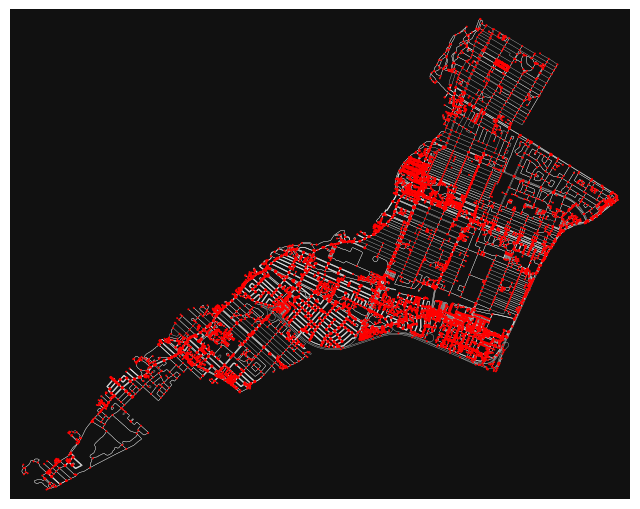

CODEID                                                       6
NOM                                              Saint-Léonard
CODEMAMH                                                 REM14
NUM                                                         14
ABREV                                                       LN
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6031403560556 45.611125588...
coords                  (-73.5960540360544, 45.58872885925455)
Name: 27, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


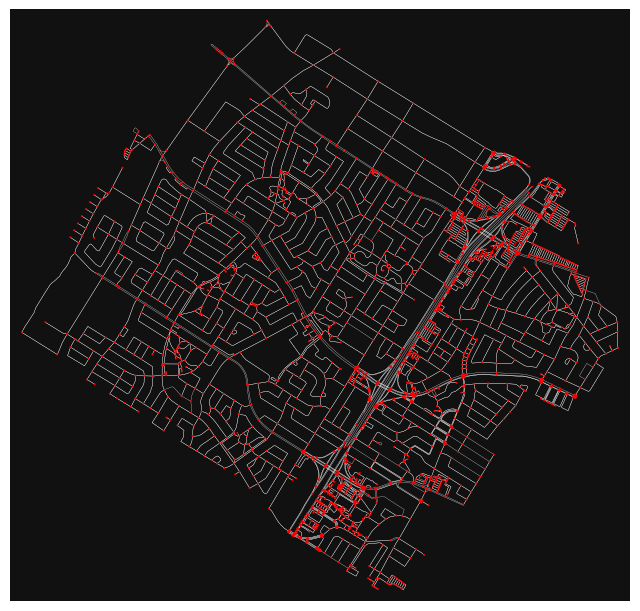

CODEID                                                      23
NOM                                                  Outremont
CODEMAMH                                                 REM05
NUM                                                          5
ABREV                                                       OM
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5902651117492 45.515780078...
coords                  (-73.60815684961821, 45.5160323028672)
Name: 28, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


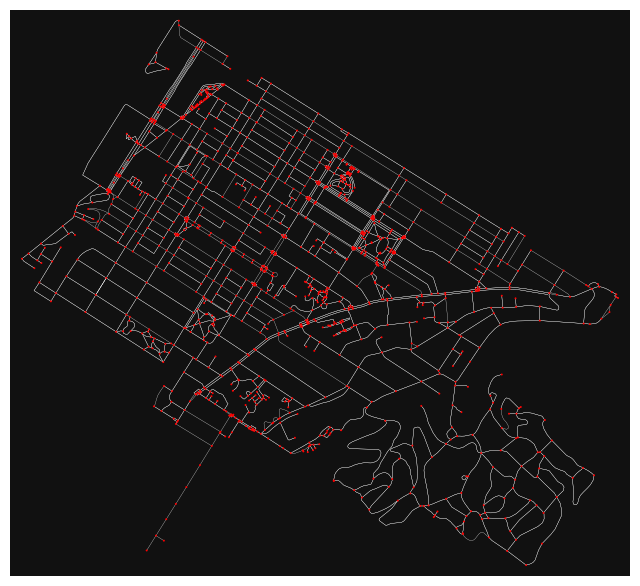

CODEID                                                      13
NOM                                                Ville-Marie
CODEMAMH                                                 REM19
NUM                                                         20
ABREV                                                       VM
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5902651117492 45.515780078...
coords                   (-73.54666320839134, 45.513329978451)
Name: 29, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


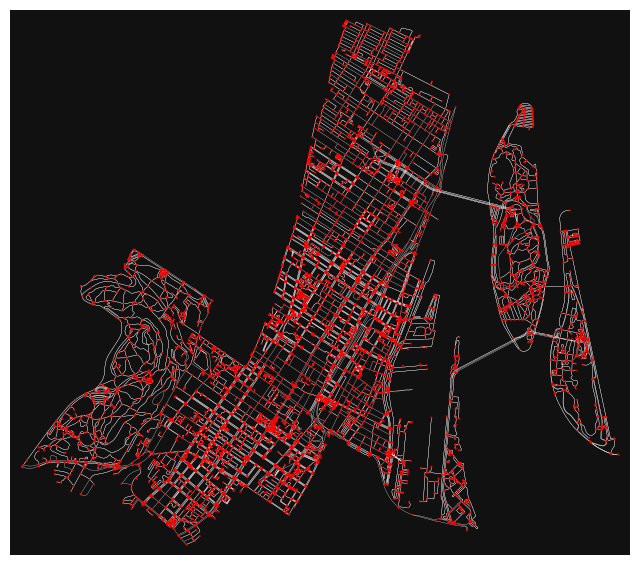

CODEID                                                      24
NOM                              L'Île-Bizard-Sainte-Geneviève
CODEMAMH                                                 REM32
NUM                                                          6
ABREV                                                       IS
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.9743512488976 45.466431593...
coords                  (-73.90258860125232, 45.4950358240728)
Name: 30, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


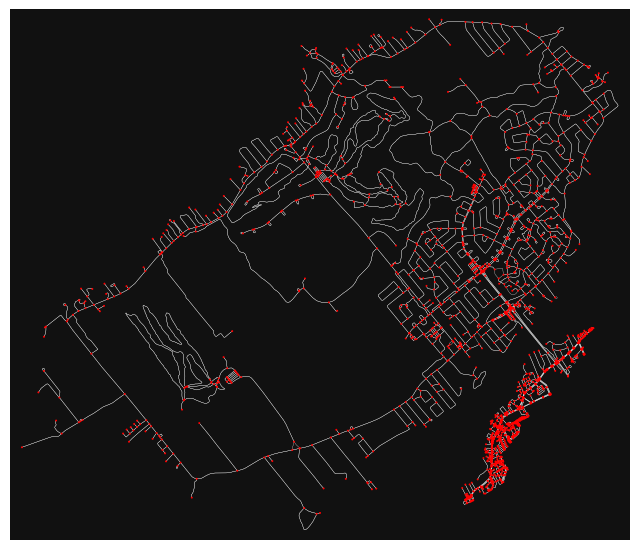

CODEID                                                       1
NOM                                                     Dorval
CODEMAMH                                                 66087
NUM                                                          1
ABREV                                                       DV
TYPE                                                Ville liée
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.7684654518276 45.418585244...
coords                 (-73.75190704056075, 45.45656078019055)
Name: 31, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


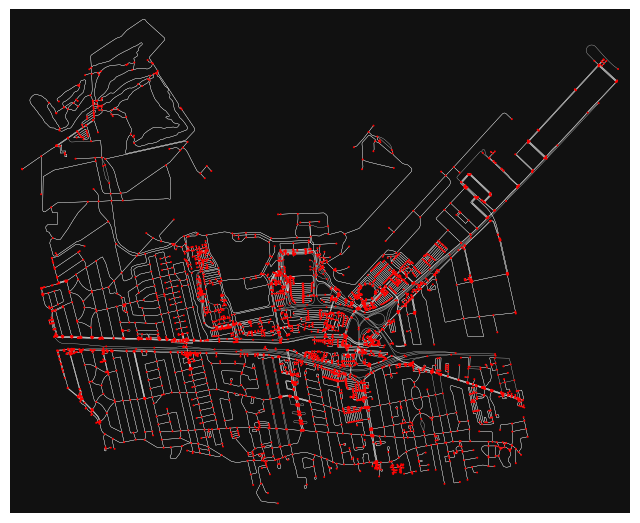

CODEID                                                       7
NOM                                              Saint-Laurent
CODEMAMH                                                 REM15
NUM                                                         15
ABREV                                                       LR
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.6828057220894 45.463178881...
coords                  (-73.72279245223316, 45.4965581982856)
Name: 32, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


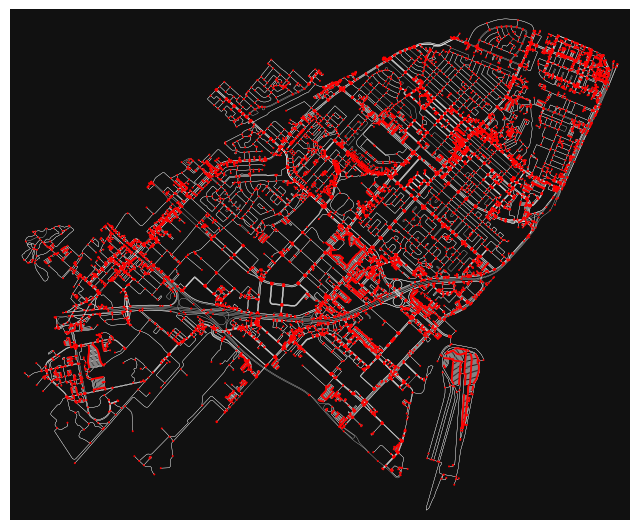

CODEID                                                      10
NOM                                                    LaSalle
CODEMAMH                                                 REM17
NUM                                                         18
ABREV                                                       LS
TYPE                                            Arrondissement
COMMENT                                                    NaN
DATEMODIF                                           2022-08-24
geometry     MULTIPOLYGON (((-73.5397979438208 45.428049341...
coords                 (-73.61880439622664, 45.43379440217815)
Name: 33, dtype: object


/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/master/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


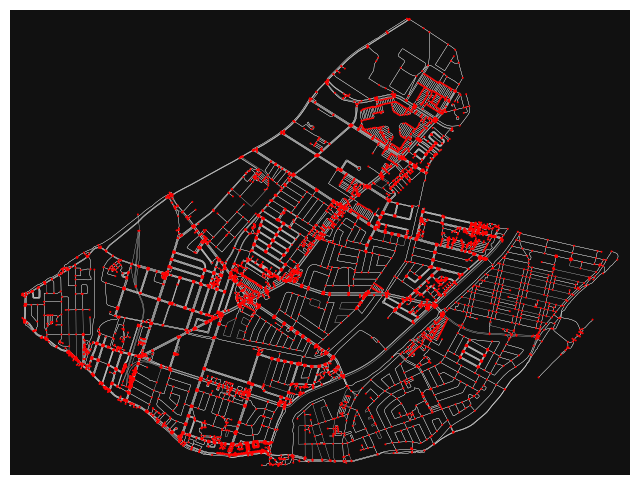

AJ             PC             RO  \
n                                  3119.000000    6325.000000    6139.000000   
m                                  8532.000000   17445.000000   17057.000000   
k_avg                                 5.470984       5.516206       5.556931   
edge_length_total                461789.932000  809320.029000  865298.849000   
edge_length_avg                      54.124465      46.392664      50.729838   
streets_per_node_avg                  3.094902       2.922213       3.241082   
intersection_count                 2822.000000    5236.000000    5688.000000   
street_length_total              277921.879000  439076.017000  514283.343000   
street_segment_count               4776.000000    9180.000000    9812.000000   
street_length_avg                    58.191348      47.829631      52.413712   
circuity_avg                          1.065034       1.065537       1.039422   
self_loop_proportion                  0.002513       0.001961       0.001529   
streets_per_node_counts_0             0.000000       0.000000       0.000000   
streets_per_node_counts_1           297.000000    1089.000000     451.000000   
streets_per_node_counts_2             9.000000      15.000000      14.000000   
streets_per_node_counts_3          1930.000000    3554.000000    3337.000000   
streets_per_node_counts_4           867.000000    1633.000000    2282.000000   
streets_per_node_counts_5            16.000000      34.000000      51.000000   
streets_per_node_proportions_0        0.000000       0.000000       0.000000   
streets_per_node_proportions_1        0.095223       0.172174       0.073465   
streets_per_node_proportions_2        0.002886       0.002372       0.002281   
streets_per_node_proportions_3        0.618788       0.561897       0.543574   
streets_per_node_proportions_4        0.277974       0.258182       0.371722   
streets_per_node_proportions_5        0.005130       0.005375       0.008308   
streets_per_node_counts_6                  NaN            NaN       4.000000   
streets_per_node_proportions_6             NaN            NaN       0.000652   
streets_per_node_counts_7                  NaN            NaN            NaN   
streets_per_node_proportions_7             NaN            NaN            NaN   
streets_per_node_counts_8                  NaN            NaN            NaN   
streets_per_node_proportions_8             NaN            NaN            NaN   
streets_per_node_counts_9                  NaN            NaN            NaN   
streets_per_node_proportions_9             NaN            NaN            NaN   
streets_per_node_counts_10                 NaN            NaN            NaN   
streets_per_node_counts_11                 NaN            NaN            NaN   
streets_per_node_counts_12                 NaN            NaN            NaN   
streets_per_node_proportions_10            NaN            NaN            NaN   
streets_per_node_proportions_11            NaN            NaN            NaN   
streets_per_node_proportions_12            NaN            NaN            NaN   

                                            KL             WM            HS  \
n                                  2822.000000     700.000000    453.000000   
m                                  8086.000000    1933.000000   1414.000000   
k_avg                                 5.730687       5.522857      6.242826   
edge_length_total                428155.708000  138408.943000  69981.091000   
edge_length_avg                      52.950248      71.603178     49.491578   
streets_per_node_avg                  3.121899       3.078571      3.421634   
intersection_count                 2535.000000     633.000000    437.000000   
street_length_total              237506.274000   76323.820000  38592.347000   
street_segment_count               4378.000000    1046.000000    760.000000   
street_length_avg                    54.249948      72.967323     50.779404   
circuity_avg                          1.111171       1

In [44]:
MAP_NETWORK_TYPE = 'all_private'  # 'walk' , 'drive', 'all_private'


res = pd.DataFrame()

for index,d in adm.iterrows()[0]:
    print(d)
    t = d.ABREV
    G = ox.graph.graph_from_polygon(polygon=d.geometry, network_type=MAP_NETWORK_TYPE,
                                    simplify=True, retain_all=False, truncate_by_edge=False,
                                    clean_periphery=True, custom_filter=None)

    fig, ax = ox.plot_graph(G, node_size=2, node_color='r', edge_color='w', edge_linewidth=0.2)
    #cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)   
    # UserWarning: The inferred zoom level of 34 is not valid for the current tile provider (valid zooms: 0 - 20).

    basic_stats = ox.basic_stats(G,area=None, clean_int_tol=None)
    #pp.pprint(basic_stats)
    df = pd.json_normalize(basic_stats, sep='_', max_level=None)
    #display(df.transpose())
    
    df.index = [t]
    ax.set_title(t)
    fig.suptitle('test title', fontsize=20)

    
    res = pd.concat([res, df])

display(res.transpose())  

In [65]:
filename = Path('..','data','generated','arrondissement_feature.joblib')

#with open(filename, 'wb') as handle:
#    dump(res, handle) # protocol=pickle.HIGHEST_PROTOCOL


In [55]:
print('THE END preprocess ')

THE END
